In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
import sklearn

In [2]:
data = pd.read_csv("Loans_data.csv")

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
print(data.shape)

(614, 13)


# Analyzing data

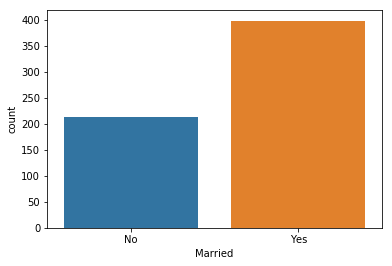

In [5]:
sns.countplot(x='Married',data=data)

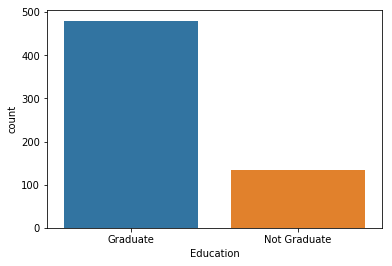

In [6]:
sns.countplot(x='Education',data=data)

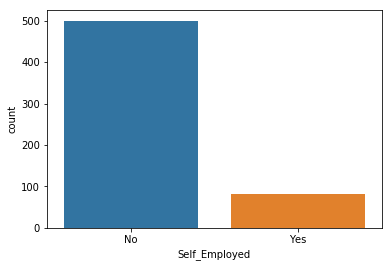

In [7]:
sns.countplot(x='Self_Employed',data=data)

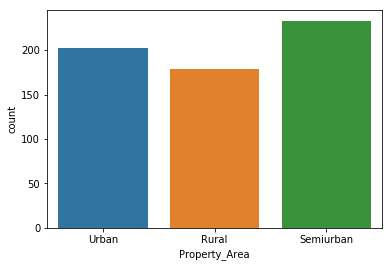

In [8]:
sns.countplot(x='Property_Area',data=data)

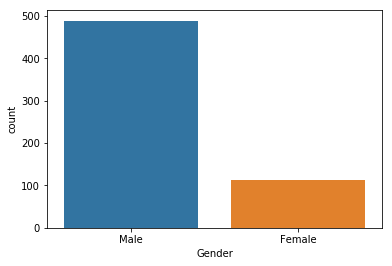

In [9]:
sns.countplot(x='Gender',data=data)

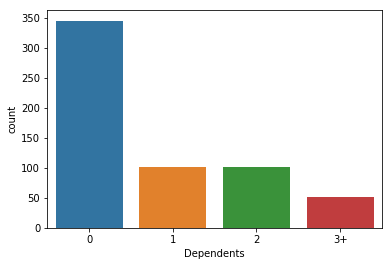

In [10]:
sns.countplot(x='Dependents',data=data)

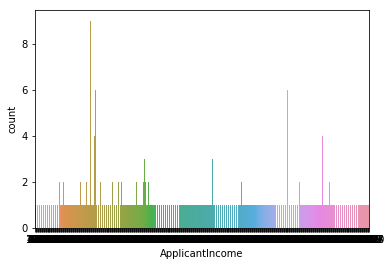

In [11]:
sns.countplot('ApplicantIncome',data=data)

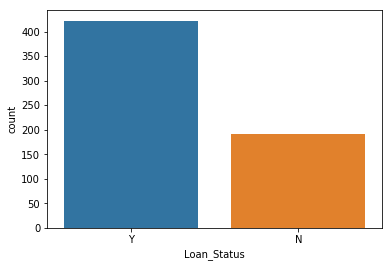

In [11]:
sns.countplot(x='Loan_Status',data=data)

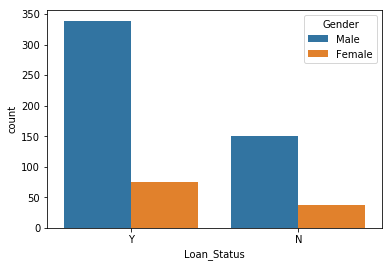

In [12]:
sns.countplot(x='Loan_Status',hue='Gender',data=data)

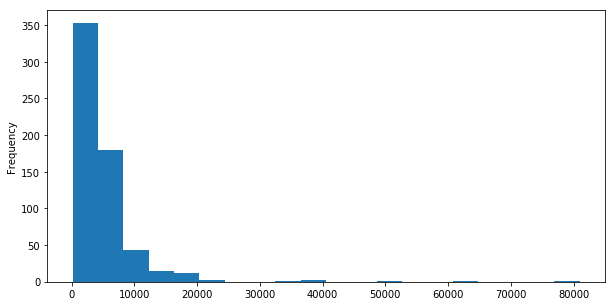

In [13]:
data['ApplicantIncome'].plot.hist(bins=20,figsize=(10,5))

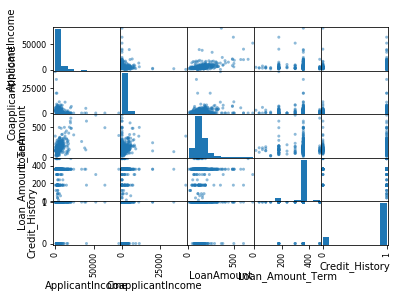

In [14]:
scatter_matrix(data)
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## data wrangling

In [16]:
data.isnull().head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

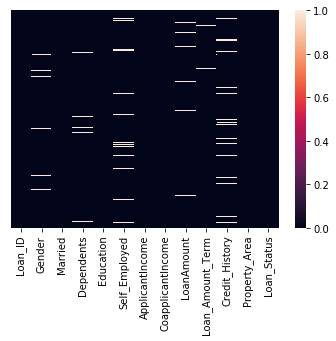

In [20]:
sns.heatmap(data.isnull(),yticklabels=False)

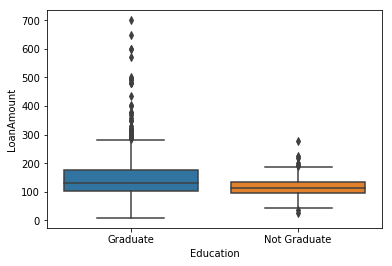

In [20]:
sns.boxplot(x='Education',y='LoanAmount',data=data)

In [21]:
data.dropna(inplace=True)

In [22]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

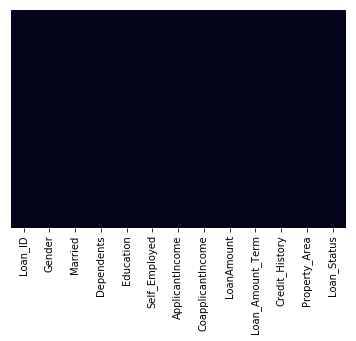

In [23]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)#no color coding

In [24]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [25]:
Sex= pd.get_dummies(data['Gender'],drop_first=True)
Sex.head(5)

,Male
1,1
2,1
3,1
4,1
5,1


In [26]:
Marital_Status = pd.get_dummies(data['Married'],drop_first=True)
Marital_Status.head(5)

,Yes
1,1
2,1
3,1
4,0
5,1


In [27]:
Dependent = pd.get_dummies(data['Dependents'],drop_first=True)
Dependent.head(5)

,1,2,3+
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0


In [28]:
Education_level = pd.get_dummies(data['Education'],drop_first=True)
Education_level.head(5)

,Not Graduate
1,0
2,0
3,1
4,0
5,0


In [29]:
Self_Emp = pd.get_dummies(data['Self_Employed'],drop_first=True)
Self_Emp.head(5)

,Yes
1,0
2,1
3,0
4,0
5,1


In [30]:
Area = pd.get_dummies(data['Property_Area'],drop_first=True)
Area.head(5)

,Semiurban,Urban
1,0,0
2,0,1
3,0,1
4,0,1
5,0,1


In [31]:
Status = pd.get_dummies(data['Loan_Status'],drop_first=True)
Status.head(5)

,Y
1,0
2,1
3,1
4,1
5,1


In [32]:
data = pd.concat([data,Sex,Marital_Status,Dependent,Education_level,Self_Emp,Area,Status],axis=1)


In [33]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,1,1,1,0,0,0,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,1,1,0,0,0,0,1,0,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,1,1,0,0,0,1,0,0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,1,0,0,0,0,0,0,0,1,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,...,1,1,0,1,0,0,1,0,1,1


In [34]:
data.drop(['Loan_ID','Gender','Education','Dependents','Married','Self_Employed','Property_Area',],axis=1,inplace=True)

In [35]:
data.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,N,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,Y,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,Y,1,1,0,1,0,0,1,0,1,1


In [36]:
data.drop(['Loan_Status'],axis=1,inplace=True)

### Train data

In [37]:
#array = data.values
X = data.drop('Y',axis=1)
y = data['Y']

In [38]:
from sklearn.model_selection import train_test_split 

In [192]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
logmodel = LogisticRegression()

In [195]:
logmodel.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [196]:
predictions = logmodel.predict(X_test)

In [197]:
from sklearn.metrics import confusion_matrix

In [198]:
confusion_matrix(y_test,predictions)

array([[ 19,  21],
       [  2, 102]], dtype=int64)

In [199]:
from sklearn.metrics import accuracy_score

In [201]:
accuracy_score(y_test,predictions)*100

84.02777777777779